# 用逻辑回归进行财务舞弊识别

In [27]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import accuracy_score
#%matplotlib qt5
%matplotlib inline

In [13]:
import pandas as pd
fraud_detection_samples=pd.read_csv("data/fraud_detection_samples.csv",dtype={"股票代码":str})
fraud_detection_samples=fraud_detection_samples.iloc[:,:-3]
fraud_detection_samples.describe().T

,count,mean,std,min,25%,50%,75%,max
财务杠杆,10497.0,1.571587,2.449333e+00,-6.477321e+00,0.982777,1.076676,1.388349,7.908656e+01
经营杠杆,10613.0,2.499447,7.909676e+01,1.000000e+00,1.167931,1.337844,1.662598,8.123917e+03
综合杠杆,10497.0,2.765861,5.999641e+00,-4.970459e+00,1.186476,1.476039,2.261625,1.796545e+02
应收账款与收入比,10641.0,0.252627,6.945546e-01,0.000000e+00,0.072102,0.178733,0.334971,4.513809e+01
应收账款周转率A,10602.0,2577.543276,2.401722e+05,2.215400e-02,2.977322,5.563564,13.694881,2.471767e+07
存货周转率A,10540.0,114.750990,3.158658e+03,5.600000e-03,1.864838,3.519224,6.814979,1.994942e+05
营运资金（资本）周转率A,8820.0,7.759248,5.822193e+01,5.115000e-03,0.967638,1.864313,4.086685,3.958995e+03
流动资产周转率A,10616.0,1.249970,1.192299e+00,3.584000e-03,0.611110,0.963804,1.514436,2.673939e+01
股东权益周转率A,10623.0,1.458181,2.496989e+00,2.897000e-03,0.575940,0.944409,1.556110,8.293450e+01
营业收入现金含量,10616.0,1.027847,1.133090e+00,0.000000e+00,0.886779,1.013373,1.111815,5.929101e+01


In [14]:
fraud_detection_samples=fraud_detection_samples.fillna(0)
fraud_detection_samples.describe().T
X = np.array(fraud_detection_samples.iloc[:,3:-2])
y = np.array(fraud_detection_samples["是否违规"])

print('类别标签:', np.unique(y))

类别标签: [0 1]


In [15]:
X[:3,:]

array([[ 1.11610700e+00,  1.44989500e+00,  1.61823800e+00,
         2.43630000e-02,  4.10462280e+01,  1.99069360e+01,
         8.82957300e+00,  2.73772000e+00,  1.11989900e+00,
         9.57005000e-01,  4.93094000e-01,  4.06278000e-01,
         7.99017000e-01,  1.44940700e+00,  1.29366700e+00,
         9.61273900e+00,  1.22676700e+00,  2.29091000e-01,
         1.08690000e-02,  5.89500000e-03,  9.20225000e-01,
         9.20345000e-01,  8.98036000e-01,  2.36378000e-01,
         0.00000000e+00,  0.00000000e+00, -1.04936600e+00,
         1.24823000e-01,  8.87930000e-02,  2.81570000e-01,
         1.15180000e-01,  7.81314000e-01,  5.51420000e-02,
         4.91482000e-01,  3.15350000e-01,  7.51270000e-02,
         1.75736000e-01,  9.77780000e-02,  4.91600000e+01,
         1.00000000e+00],
       [ 1.36886100e+00,  2.53111800e+00,  3.46474900e+00,
         1.82217000e-01,  5.48796700e+00,  1.03637600e+00,
         3.75901000e-01,  2.06566000e-01,  2.57127000e-01,
         8.80866000e-01,  1.00

In [16]:
fraud_detection_samples.head(1).T

,0
股票代码,601678
截止日期,2010/12/31
行业代码,S90
财务杠杆,1.11611
经营杠杆,1.4499
综合杠杆,1.61824
应收账款与收入比,0.024363
应收账款周转率A,41.0462
存货周转率A,19.9069
营运资金（资本）周转率A,8.82957


进行数据分割： 70% training and 30% test 数据:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)   # add , random_state=1 to generate the same split set

In [18]:
print('y中的不同标签数量:', np.bincount(y))
print('y_train中的不同标签数量:', np.bincount(y_train))
print('y_test中的不同标签数量:', np.bincount(y_test))

y中的不同标签数量: [6983 3658]
y_train中的不同标签数量: [4888 2560]
y_test中的不同标签数量: [2095 1098]


## 对特征进行规范化处理: 

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 建立逻辑回归模型类

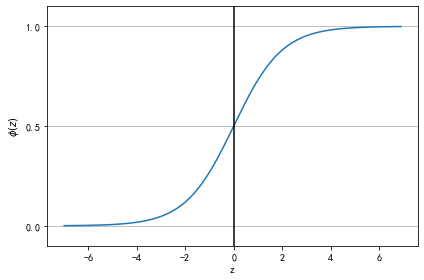

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

### Logistic Regression的损失函数曲线

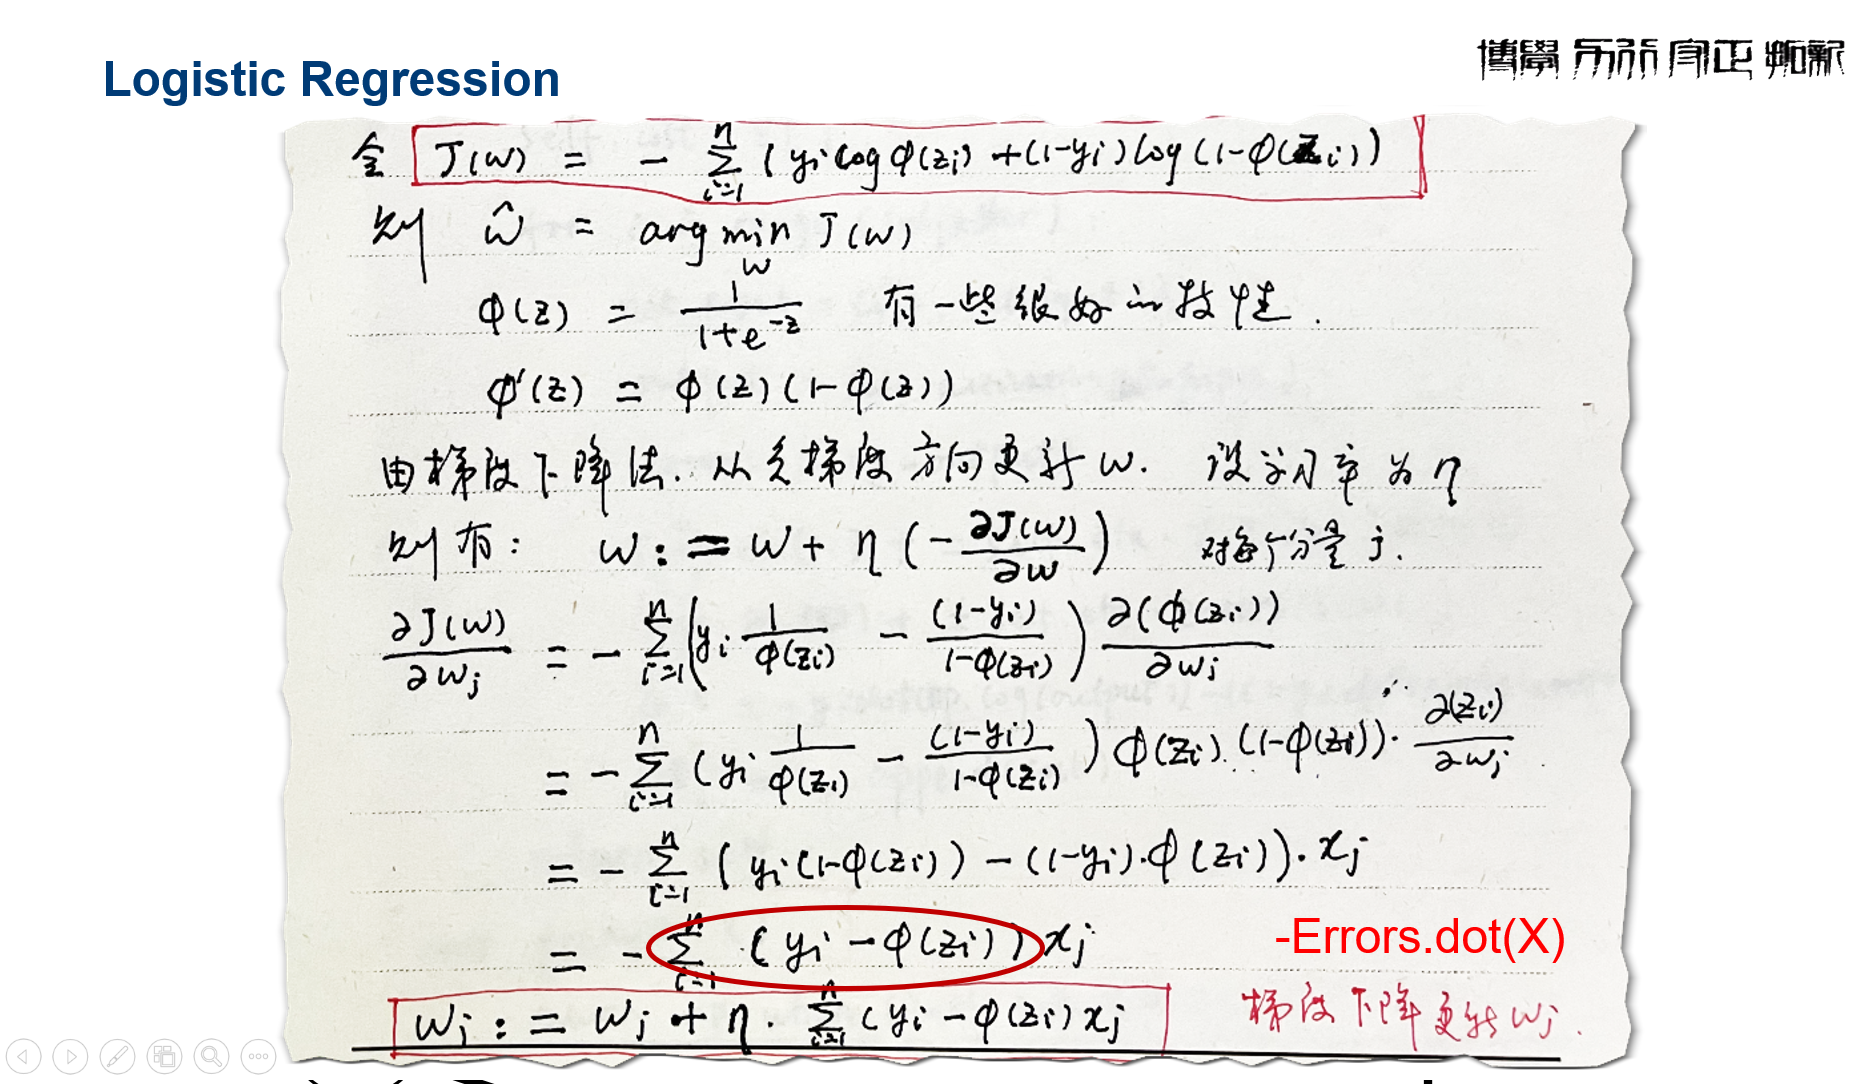

In [21]:
Image(filename='images/03_03_1.png', width=800) 

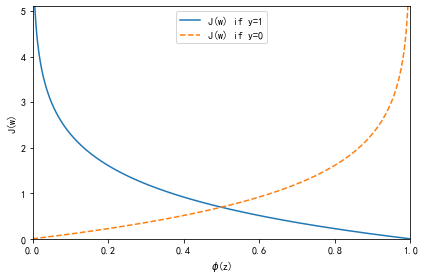

In [132]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

In [23]:
class LogisticRegressionGD(object):
    """
    用梯度下降法实现的逻辑回归分类算法.

    参数
    ------------
    eta : float --学习率
      Learning rate (between 0.0 and 1.0)
    n_iter : int --迭代次数
      Passes over the training dataset.
    random_state : int  --随机数发生器种子
      Random number generator seed for random weight
      initialization.


    属性
    -----------
    w_ : 1d-array  --权重系数向量
      Weights after fitting.
    cost_ : list  --每个epoch计算出的cost值
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.02, n_iter=1000, random_state=2):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ 拟合训练数据.

        Parameters
        参数
        X : {array-like}, shape = [n_examples, n_features] 
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #给w随机取初值 ,+1包括常数项
        
        self.cost_ = []        
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            if i<2:
                print(self.w_[1:])
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))  #交叉熵损失
            self.cost_.append(cost)                 
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<br>
<br>

In [25]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.02, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

y_pred = lrgd.predict(X_test_std)

[-0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539  0.01744812
 -0.00761207  0.00319039 -0.0024937   0.01462108 -0.02060141 -0.00322417
 -0.00384054  0.01133769 -0.01099891 -0.00172428 -0.00877858  0.00042214
  0.00582815 -0.01100619  0.01144724  0.00901591  0.00502494  0.00900856
 -0.00683728 -0.0012289  -0.00935769 -0.00267888  0.00530355 -0.00691661
 -0.00396754 -0.00687173 -0.00845206 -0.00671246 -0.00012665 -0.0111731
  0.00234416  0.01659802  0.00742044 -0.00191836]
[  7.86120128   1.42419538   7.64429591   0.78763033  -0.08586056
  -1.62314584   1.42867697  -0.89944721   6.25680914   2.37309096
   1.02926941  -0.12033983   1.81101731  -6.46076611  -1.71168714
   3.54960375  -1.2268028   12.94019118   1.93787882   1.76438426
  -1.37227941  -1.44150858   0.82048708   0.99983248   2.15625129
   1.81276758   1.74986696  -8.32510175 -11.53618886  -8.43361068
  -2.83430538   7.509518     3.52227878   1.43258687  -5.39360788
  -6.08029089  -5.95567295 -13.25885075 -13.9934394

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


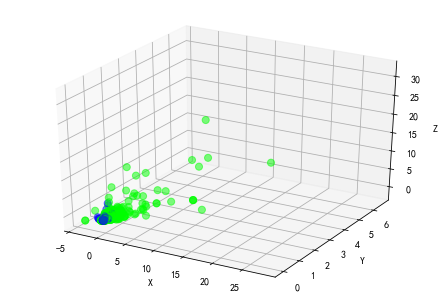

In [28]:
ax = Axes3D(plt.figure("识别结果"))
ax.scatter(X_test_std[:,0],X_test_std[:,1], X_test_std[:,2],c=y_pred, s=50,cmap=plt.cm.brg,alpha=0.5) 
#plt.ylim(-5,5)
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [29]:
print('误分样本数: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

误分样本数: 844
Accuracy: 0.736


In [30]:
X_test_std.shape

(3193, 40)

### 调用scikit-learn中的逻辑回归算法进行分类

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr',max_iter=1000)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

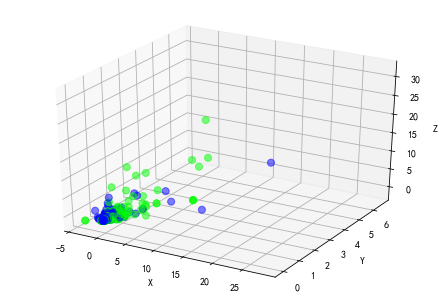

In [39]:
ax = Axes3D(plt.figure("识别结果"))
ax.scatter(X_test_std[:,0],X_test_std[:,1], X_test_std[:,2],c=y_pred, s=50,cmap=plt.cm.brg,alpha=0.5) 
#plt.ylim(-5,5)
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [48]:
lr.classes_

array([0, 1], dtype=int64)

In [49]:
lr.predict_proba(X_test_std[-3:, :])

array([[0.98729795, 0.01270205],
       [0.69842184, 0.30157816],
       [0.67717673, 0.32282327]])

In [50]:
lr.predict_proba(X_test_std[-3:, :]).sum(axis=1)

array([1., 1., 1.])

In [51]:
lr.predict_proba(X_test_std[-3:, :]).argmax(axis=1)

array([0, 0, 0], dtype=int64)

In [52]:
lr.predict(X_test_std[-3:, :])

array([0, 0, 0], dtype=int64)

In [53]:
print('误分样本数: %d' % (y_test != y_pred).sum())
print('准确率Accuracy: %.3f' % accuracy_score(y_test, y_pred))

误分样本数: 529
准确率Accuracy: 0.834
